## **Load and prepare data**

In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load data
df = pd.read_excel("arrhythmia.xlsx")

In [3]:
# head of data
print(df.head())

   Var1  Var2  Var3  Var4  Var5  Var6  Var7  Var8  Var9  Var10  ...  Var271  \
0    75     0   190    80    91   193   371   174   121    -16  ...     0.0   
1    56     1   165    64    81   174   401   149    39     25  ...     0.0   
2    54     0   172    95   138   163   386   185   102     96  ...     0.0   
3    55     0   175    94   100   202   380   179   143     28  ...     0.0   
4    13     0   169    51   100   167   321   174    91    107  ...    -0.6   

   Var272  Var273  Var274  Var275  Var276  Var277  Var278  Var279   rythme  
0     9.0    -0.9     0.0       0     0.9     2.9    23.3    49.4  anormal  
1     8.5     0.0     0.0       0     0.2     2.1    20.4    38.8  anormal  
2     9.5    -2.4     0.0       0     0.3     3.4    12.3    49.0  anormal  
3    12.2    -2.2     0.0       0     0.4     2.6    34.6    61.6   normal  
4    12.2    -2.8     0.0       0     0.9     2.2    13.5    31.1  anormal  

[5 rows x 279 columns]


In [4]:
# shape of data
print(df.shape)

(420, 279)


In [5]:
# values count
df["rythme"].value_counts()

rythme
normal     237
anormal    183
Name: count, dtype: int64

In [7]:
# split data to train and test
from sklearn.model_selection import train_test_split
# separate features and target
X = df.drop('rythme', axis=1)
y = df['rythme']

# split data with 220 samples for training and 200 for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=220, test_size=200, random_state=1, stratify=y)

## **Arbre de décision**

In [8]:
from sklearn.tree import DecisionTreeClassifier

# create and train the decision tree classifier
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

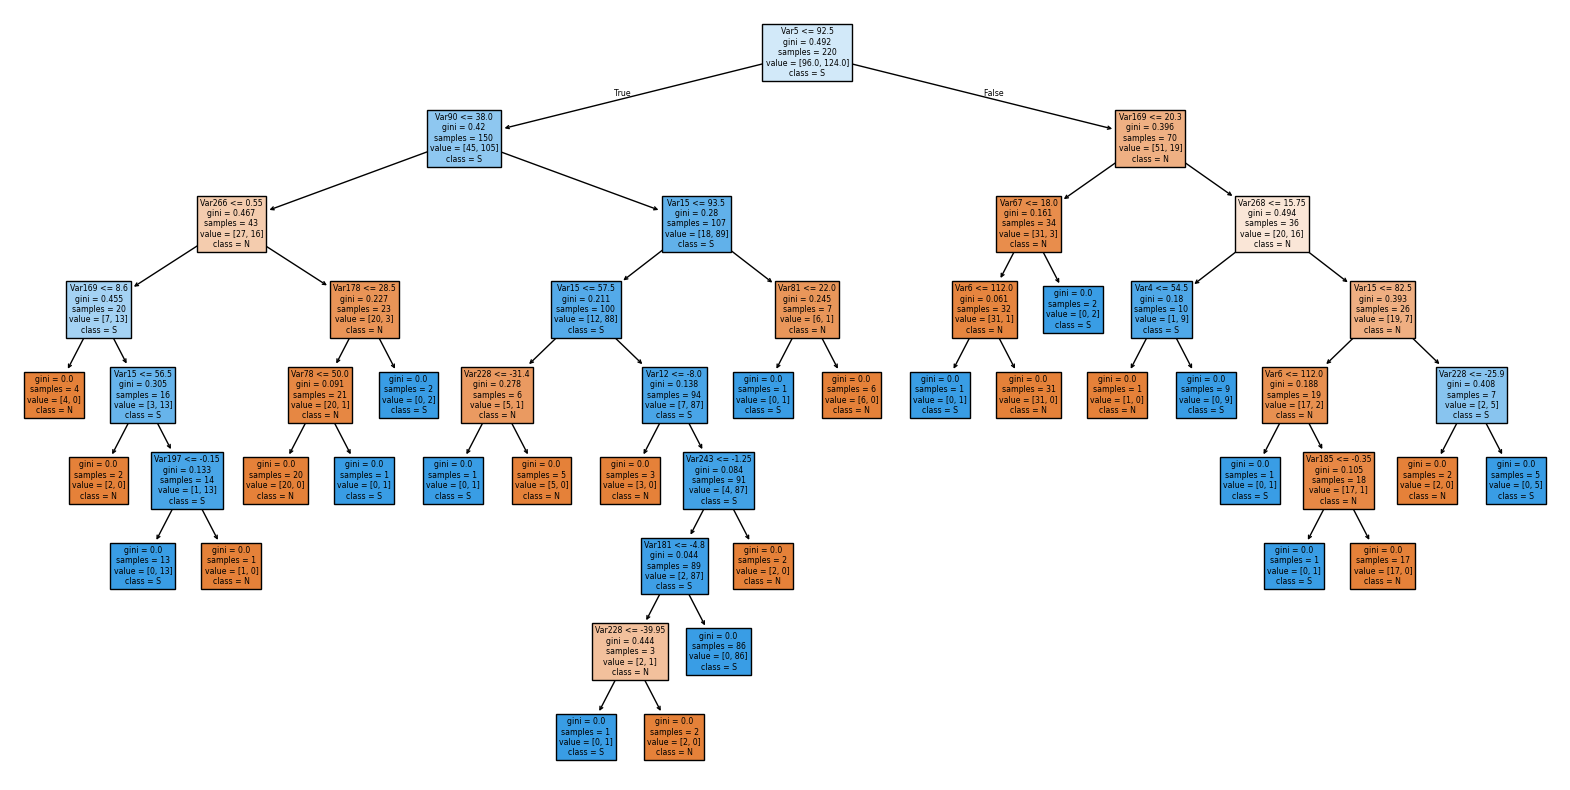

In [9]:
# show the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["N", "S", "V", "F", "Q"])
plt.show()

In [10]:
# show the decision tree as text
from sklearn.tree import export_text
tree_rules = export_text(dt_model, feature_names=list(X.columns))
print(tree_rules)

|--- Var5 <= 92.50
|   |--- Var90 <= 38.00
|   |   |--- Var266 <= 0.55
|   |   |   |--- Var169 <= 8.60
|   |   |   |   |--- class: anormal
|   |   |   |--- Var169 >  8.60
|   |   |   |   |--- Var15 <= 56.50
|   |   |   |   |   |--- class: anormal
|   |   |   |   |--- Var15 >  56.50
|   |   |   |   |   |--- Var197 <= -0.15
|   |   |   |   |   |   |--- class: normal
|   |   |   |   |   |--- Var197 >  -0.15
|   |   |   |   |   |   |--- class: anormal
|   |   |--- Var266 >  0.55
|   |   |   |--- Var178 <= 28.50
|   |   |   |   |--- Var78 <= 50.00
|   |   |   |   |   |--- class: anormal
|   |   |   |   |--- Var78 >  50.00
|   |   |   |   |   |--- class: normal
|   |   |   |--- Var178 >  28.50
|   |   |   |   |--- class: normal
|   |--- Var90 >  38.00
|   |   |--- Var15 <= 93.50
|   |   |   |--- Var15 <= 57.50
|   |   |   |   |--- Var228 <= -31.40
|   |   |   |   |   |--- class: normal
|   |   |   |   |--- Var228 >  -31.40
|   |   |   |   |   |--- class: anormal
|   |   |   |--- Var15 >  57.

In [13]:
# importances of features
importances = dt_model.feature_importances_

# sort the features by importance
indices = np.argsort(importances)[::-1]

# names of features
names = [X.columns[i] for i in indices]

# print the features and their importance
for i in range(X.shape[1]):
    print(f"{names[i]}: {importances[indices[i]]}")

Var15: 0.188674969854408
Var5: 0.16201036866359445
Var90: 0.11978626227818645
Var169: 0.08004522093335538
Var228: 0.05412346390168971
Var266: 0.05337025492786242
Var268: 0.05310575774285451
Var12: 0.04905917906732942
Var243: 0.03454354181519823
Var6: 0.033520785681160785
Var67: 0.03264782475490197
Var178: 0.030610654734076877
Var181: 0.023810962103821796
Var78: 0.01760112647209422
Var185: 0.0174544504181601
Var197: 0.017161098310291865
Var4: 0.01663306451612904
Var81: 0.015841013824884797
Var100: 0.0
Var96: 0.0
Var95: 0.0
Var99: 0.0
Var92: 0.0
Var94: 0.0
Var93: 0.0
Var97: 0.0
Var98: 0.0
Var279: 0.0
Var91: 0.0
Var89: 0.0
Var88: 0.0
Var87: 0.0
Var101: 0.0
Var85: 0.0
Var84: 0.0
Var83: 0.0
Var82: 0.0
Var80: 0.0
Var79: 0.0
Var77: 0.0
Var76: 0.0
Var86: 0.0
Var105: 0.0
Var102: 0.0
Var119: 0.0
Var133: 0.0
Var132: 0.0
Var131: 0.0
Var130: 0.0
Var129: 0.0
Var128: 0.0
Var127: 0.0
Var126: 0.0
Var125: 0.0
Var124: 0.0
Var123: 0.0
Var122: 0.0
Var121: 0.0
Var120: 0.0
Var118: 0.0
Var103: 0.0
Var117: 0.0

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Make predictions on test set
y_pred = dt_model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy)

# Display confusion matrix with labels for better interpretation
print("\nDetailed Confusion Matrix:")
print("                 Predicted Normal  Predicted Anormal")
print(f"Actual Normal      {conf_matrix[0][0]}               {conf_matrix[0][1]}")
print(f"Actual Anormal    {conf_matrix[1][0]}               {conf_matrix[1][1]}")

Confusion Matrix:
[[52 35]
 [29 84]]

Accuracy Score: 0.68

Detailed Confusion Matrix:
                 Predicted Normal  Predicted Anormal
Actual Normal      52               35
Actual Anormal    29               84


## **Bagging**

In [15]:
from sklearn.ensemble import BaggingClassifier

# Create a bagging classifier
# Using the previously created decision tree (dt_model) as base estimator
# Setting n_estimators to 100 and enabling oob_score
bag_model = BaggingClassifier(
    estimator=dt_model,
    n_estimators=100,
    oob_score=True,
    random_state=1
)

# Train the bagging model
bag_model.fit(X_train, y_train)

# Make predictions
y_pred_bag = bag_model.predict(X_test)

# Calculate and print the OOB score
print("Out-of-bag score:", bag_model.oob_score_)

# Calculate and print accuracy on test set
accuracy_bag = accuracy_score(y_test, y_pred_bag)
print("\nTest set accuracy:", accuracy_bag)

# Calculate and print confusion matrix
conf_matrix_bag = confusion_matrix(y_test, y_pred_bag)
print("\nConfusion Matrix:")
print("                 Predicted Normal  Predicted Anormal")
print(f"Actual Normal      {conf_matrix_bag[0][0]}               {conf_matrix_bag[0][1]}")
print(f"Actual Anormal    {conf_matrix_bag[1][0]}               {conf_matrix_bag[1][1]}")

Out-of-bag score: 0.7954545454545454

Test set accuracy: 0.82

Confusion Matrix:
                 Predicted Normal  Predicted Anormal
Actual Normal      67               20
Actual Anormal    16               97


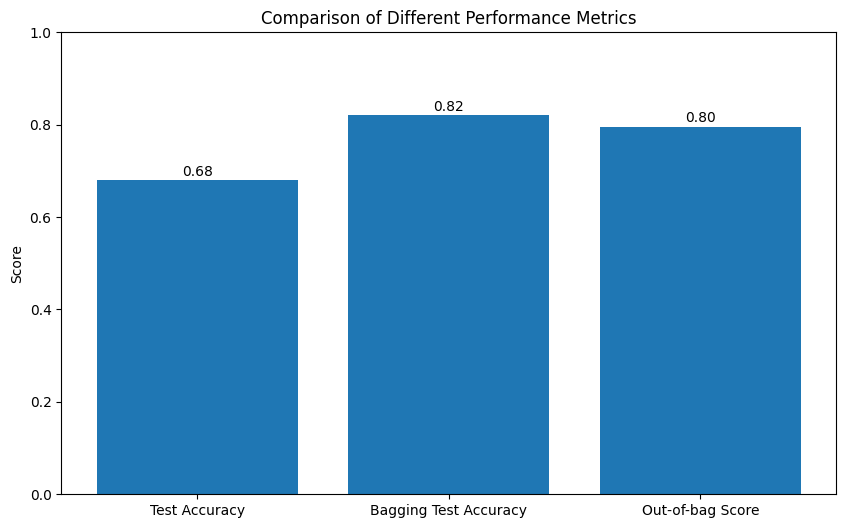

In [16]:
# Create a bar plot comparing the scores
plt.figure(figsize=(10,6))
scores = {
    'Test Accuracy': accuracy,
    'Bagging Test Accuracy': accuracy_bag,
    'Out-of-bag Score': bag_model.oob_score_
}

plt.bar(scores.keys(), scores.values())
plt.title('Comparison of Different Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)

# Add value labels on top of each bar
for i, v in enumerate(scores.values()):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.show()

In [17]:
# Create a comparison string explaining the performance difference
performance_diff = accuracy_bag - accuracy
print(f"Bagging improved accuracy by {performance_diff:.2%} points")
print("\nConclusion:")
print("- Single Decision Tree accuracy: {:.2%}".format(accuracy))
print("- Bagging Decision Trees accuracy: {:.2%}".format(accuracy_bag))
print("- Bagging significantly improved the model's performance by using ensemble learning")
print("- The improvement suggests that combining multiple trees helps reduce overfitting")

Bagging improved accuracy by 14.00% points

Conclusion:
- Single Decision Tree accuracy: 68.00%
- Bagging Decision Trees accuracy: 82.00%
- Bagging significantly improved the model's performance by using ensemble learning
- The improvement suggests that combining multiple trees helps reduce overfitting


Cross-validation scores: [0.88095238 0.82142857 0.79761905 0.82142857 0.8452381 ]
Mean CV score: 0.833 (+/- 0.056)


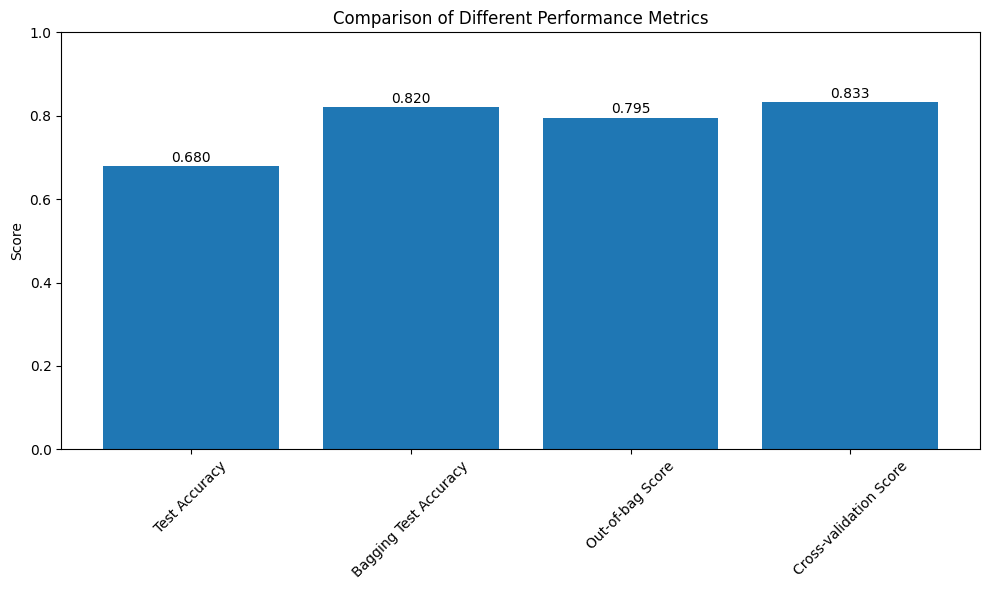

In [18]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross validation on the bagging classifier
cv_scores = cross_val_score(bag_model, X, y, cv=5)

# Print the cross-validation scores and their mean
print("Cross-validation scores:", cv_scores)
print("Mean CV score: {:.3f} (+/- {:.3f})".format(cv_scores.mean(), cv_scores.std() * 2))

# Create an updated comparison plot including CV score
plt.figure(figsize=(10,6))
scores = {
    'Test Accuracy': accuracy,
    'Bagging Test Accuracy': accuracy_bag,
    'Out-of-bag Score': bag_model.oob_score_,
    'Cross-validation Score': cv_scores.mean()
}

plt.bar(scores.keys(), scores.values())
plt.title('Comparison of Different Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(scores.values()):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()

## **Random Forest**

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Create and train Random Forest model with OOB score enabled
rf_model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=1)
rf_model.fit(X_train, y_train)

# Get predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracies
oob_score = rf_model.oob_score_
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Display results
print("Out-of-bag score:", oob_score)

Out-of-bag score: 0.8


Top 15 Most Important Features:

    Feature  Decision Tree  Random Forest
7      Var8         0.0000         0.0339
13    Var15         0.1887         0.0329
231  Var233         0.0000         0.0285
91    Var93         0.0000         0.0253
89    Var91         0.0000         0.0244
226  Var228         0.0541         0.0237
88    Var90         0.1198         0.0193
4      Var5         0.1620         0.0184
222  Var224         0.0000         0.0182
165  Var167         0.0000         0.0149
241  Var243         0.0345         0.0139
275  Var277         0.0000         0.0134
175  Var177         0.0000         0.0128
220  Var222         0.0000         0.0127
197  Var199         0.0000         0.0127


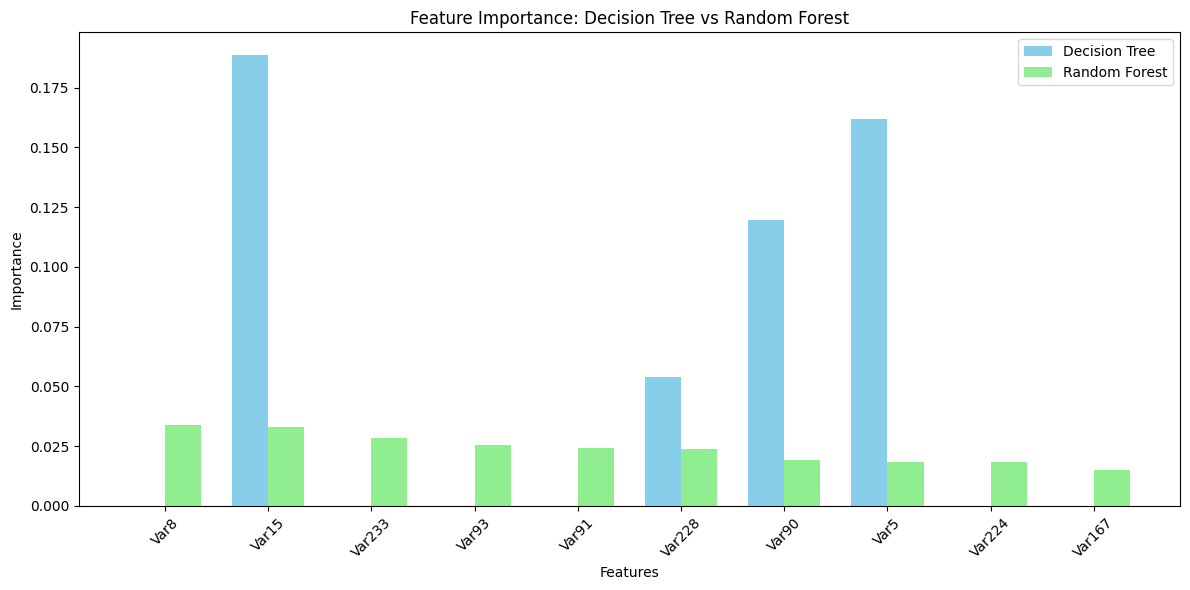

In [21]:
# Get feature importances from both models
dt_importances = dt_model.feature_importances_
rf_importances = rf_model.feature_importances_

# Create a dataframe to compare both
comparison_df = pd.DataFrame({
    'Feature': X.columns,
    'Decision Tree': dt_importances,
    'Random Forest': rf_importances
})

# Sort by Random Forest importance (typically more robust)
comparison_df = comparison_df.sort_values('Random Forest', ascending=False)

# Display top 15 most important features
print("Top 15 Most Important Features:\n")
print(comparison_df.head(15).round(4))

# Create a bar plot comparing top 10 features
plt.figure(figsize=(12, 6))
top10 = comparison_df.head(10)

x = range(len(top10))
width = 0.35

plt.bar([i - width/2 for i in x], top10['Decision Tree'], width, label='Decision Tree', color='skyblue')
plt.bar([i + width/2 for i in x], top10['Random Forest'], width, label='Random Forest', color='lightgreen')

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance: Decision Tree vs Random Forest')
plt.xticks(x, top10['Feature'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## **Boosting**

## **Gradient Boosting**

In [33]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 

In [34]:
heart_disease

{'data': {'ids': None,
  'features':      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
  0     63    1   1       145   233    1        2      150      0      2.3   
  1     67    1   4       160   286    0        2      108      1      1.5   
  2     67    1   4       120   229    0        2      129      1      2.6   
  3     37    1   3       130   250    0        0      187      0      3.5   
  4     41    0   2       130   204    0        2      172      0      1.4   
  ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
  298   45    1   1       110   264    0        0      132      0      1.2   
  299   68    1   4       144   193    1        0      141      0      3.4   
  300   57    1   4       130   131    0        0      115      1      1.2   
  301   57    0   2       130   236    0        2      174      0      0.0   
  302   38    1   3       138   175    0        0      173      0      0.0   
  
       slope   ca  thal  


In [35]:
# get the data
X_hd = heart_disease.data

In [36]:
X_hd

{'ids': None,
 'features':      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   1       145   233    1        2      150      0      2.3   
 1     67    1   4       160   286    0        2      108      1      1.5   
 2     67    1   4       120   229    0        2      129      1      2.6   
 3     37    1   3       130   250    0        0      187      0      3.5   
 4     41    0   2       130   204    0        2      172      0      1.4   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   45    1   1       110   264    0        0      132      0      1.2   
 299   68    1   4       144   193    1        0      141      0      3.4   
 300   57    1   4       130   131    0        0      115      1      1.2   
 301   57    0   2       130   236    0        2      174      0      0.0   
 302   38    1   3       138   175    0        0      173      0      0.0   
 
      slope   ca  thal  
 0        3  0.0   6.0 

In [32]:
# save in csv
heart_disease.to_csv("heart_disease.csv", index=False)  

TypeError: 'NoneType' object is not callable